# World Indicators Dataset -- Women in Politics 

This notebook explores several questions regarding the participation of women in government. Such questions are: 
* What is the current state of women's representation in law-making bodies?
* Is there a historical trend to women participating in goverment?
* Is there a correlation between this particular social indicator and other economic indicators? 

Women comprise of half of the world population, but are excluded from most major social and economic activities. Representation in law-making bodies is important in inclusive policy-making. Policies that provide access to educational or employment resources that benefit women will inevitably benefit the economy.  

The main indicator of concern is "Proportion of seats held by women in national parliaments (%)" as reported by the Inter-Parliamentary Union (IPU). The scope and limitations of the indicator are outlined in the data source.  

** Sources: **
* https://www.kaggle.com/worldbank/world-development-indicators/version/2

* https://data.worldbank.org/indicator/SG.GEN.PARL.ZS?end=2016&start=1990&view=chart

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)

## Read in datafiles

In [6]:
country_data = pd.read_csv('./world-development-indicators/Country.csv')
country_data['Region'].value_counts(),country_data['IncomeGroup'].value_counts()

(Europe & Central Asia         57
 Sub-Saharan Africa            48
 Latin America & Caribbean     41
 East Asia & Pacific           36
 Middle East & North Africa    21
 South Asia                     8
 North America                  3
 Name: Region, dtype: int64, Upper middle income     53
 Lower middle income     51
 High income: nonOECD    47
 High income: OECD       32
 Low income              31
 Name: IncomeGroup, dtype: int64)

In [8]:
# Conditional statement to use truncated dataset?
indicator_data = pd.read_csv('./world-development-indicators/Indicators.csv')

## Merge indicator table with the country table

In [9]:
full_data = indicator_data.merge(country_data[['CountryCode', 'ShortName', 'Region', 'IncomeGroup']],
               on = 'CountryCode',
               how = 'inner')

del full_data["IndicatorCode"]
full_data.head(15)

,CountryName,CountryCode,IndicatorName,Year,Value,ShortName,Region,IncomeGroup
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",1960,1.335609e+02,Arab World,NaN,NaN
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,1960,8.779760e+01,Arab World,NaN,NaN
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",1960,6.634579e+00,Arab World,NaN,NaN
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",1960,8.102333e+01,Arab World,NaN,NaN
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),1960,3.000000e+06,Arab World,NaN,NaN
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),1960,5.380000e+08,Arab World,NaN,NaN
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",1960,4.769789e+01,Arab World,NaN,NaN
7,Arab World,ARB,CO2 emissions (kt),1960,5.956399e+04,Arab World,NaN,NaN
8,Arab World,ARB,CO2 emissions (metric tons per capita),1960,6.439635e-01,Arab World,NaN,NaN
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,1960,5.041292e+00,Arab World,NaN,NaN


## Create the filters

In [12]:
# Filter the GDP per capita (constant 2005 USdollar)
filter_gdp = full_data['IndicatorName'].str.contains('GDP per capita \(constant 2005')

# Filter the Proportion of seats held by women in national parliaments (%)
filter_pol = full_data['IndicatorName'].str.contains('Proportion of seats held by women')

## Correlation Calculation

In [18]:
gdp_temp = full_data[filter_gdp].rename(columns={'Value': 'GDP per capita'})
gdp_fullname= gdp_temp['IndicatorName'].unique().tolist()[0]
del gdp_temp["IndicatorName"]

pol_temp = full_data[filter_pol].rename(columns={'Value': 'Women in Politics'})
pol_fullname = pol_temp['IndicatorName'].unique().tolist()[0]
del pol_temp["IndicatorName"]

data_polgdp = gdp_temp.merge(pol_temp[['CountryCode', 'Year', 'Women in Politics']],
               on = ['CountryCode', 'Year'],
               how = 'inner')
data_polgdp.head()

,CountryName,CountryCode,Year,GDP per capita,ShortName,Region,IncomeGroup,Women in Politics
0,Arab World,ARB,1990,2907.404146,Arab World,NaN,NaN,3.891439
1,Arab World,ARB,1997,3129.301926,Arab World,NaN,NaN,3.757835
2,Arab World,ARB,1998,3207.791616,Arab World,NaN,NaN,3.474235
3,Arab World,ARB,1999,3210.626370,Arab World,NaN,NaN,3.623432
4,Arab World,ARB,2000,3299.840771,Arab World,NaN,NaN,3.768103


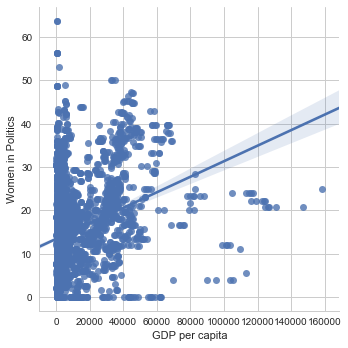

In [23]:
sns.lmplot(x="GDP per capita", y="Women in Politics", 
           data=data_polgdp);

In [46]:
data_polgdp.groupby("Year").corr()

GDP per capita  Women in Politics
Year                                                     
1990 GDP per capita           1.000000           0.162693
     Women in Politics        0.162693           1.000000
1997 GDP per capita           1.000000           0.344219
     Women in Politics        0.344219           1.000000
1998 GDP per capita           1.000000           0.385085
     Women in Politics        0.385085           1.000000
1999 GDP per capita           1.000000           0.411233
     Women in Politics        0.411233           1.000000
2000 GDP per capita           1.000000           0.389221
     Women in Politics        0.389221           1.000000
2001 GDP per capita           1.000000           0.391548
     Women in Politics        0.391548           1.000000
2002 GDP per capita           1.000000           0.352832
     Women in Politics        0.352832           1.000000
2003 GDP per capita           1.000000           0.326924
     Women in Politics        0.326924           1.000000
2004 GDP per capita           1.000000           0.325182
     Women in Politics        0.325182           1.000000
2005 GDP per capita           1.000000           0.336083
     Women in Politics        0.336083           1.000000
2006 GDP per capita           1.000000           0.300186
     Women in Politics        0.300186           1.000000
2007 GDP per capita           1.000000           0.294300
     Women in Politics        0.294300           1.000000
2008 GDP per capita           1.000000           0.287276
     Women in Politics        0.287276           1.000000
2009 GDP per capita           1.000000           0.304725
     Women in Politics        0.304725           1.000000
2010 GDP per capita           1.000000           0.314053
     Women in Politics        0.314053           1.000000
2011 GDP per capita           1.000000           0.308792
     Women in Politics        0.308792           1.000000
2012 GDP per capita           1.000000           0.274693
     Women in Politics        0.274693           1.000000
2013 GDP per capita           1.000000           0.274698
     Women in Politics        0.274698           1.000000
2014 GDP per capita           1.000000           0.270011
     Women in Politics        0.270011           1.000000

Not a strong correlation (corr = 0.307) between percent of women in parliament seats and GDP. A closer look is warrented, focus on differences historically, by region and income group. 

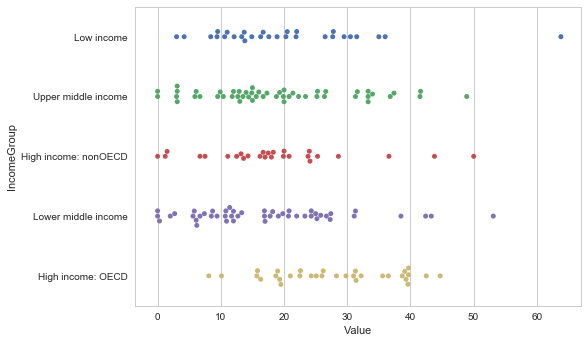

In [26]:
# Create a year filter
year_filter = full_data["Year"] == 2014

sns.swarmplot(x="Value", y="IncomeGroup", data=full_data[year_filter & filter_pol]);

In [27]:
order = ['High income: OECD','High income: nonOECD','Upper middle income','Lower middle income','Low income']

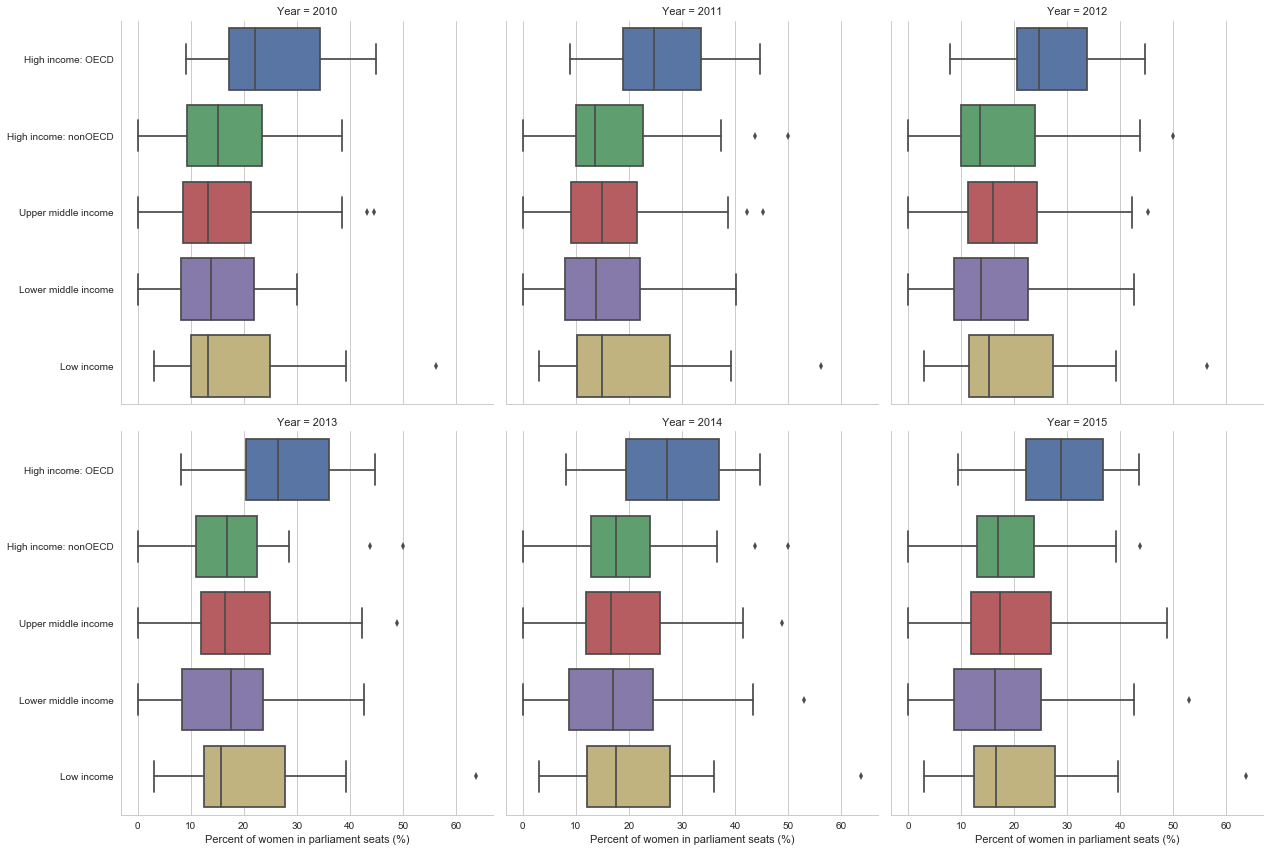

In [40]:
# Politics and Income Group
year_filter = full_data["Year"] >= 2010

pol = sns.factorplot(x="Value", y="IncomeGroup", data=full_data[filter_pol & year_filter], units=pol_fullname,
                     col="Year", col_wrap=3, kind="box",
                     order=order,
                     size=6, aspect=1);

pol.set_axis_labels("Percent of women in parliament seats (%)","");

In [31]:
full_data[filter_pol & year_filter].groupby(["IncomeGroup", "Year"]).describe()

Value                                             \
                          count       mean        std       min        25%   
IncomeGroup          Year                                                    
High income: OECD    2010  32.0  25.400000  10.408216  9.100000  17.175000   
                     2011  32.0  26.268750   9.999175  8.800000  18.850000   
                     2012  32.0  26.531250   9.799850  7.900000  20.600000   
                     2013  32.0  27.237500   9.884486  8.100000  20.475000   
                     2014  32.0  27.800000   9.920068  8.100000  19.450000   
                     2015  32.0  28.333163   9.518327  9.473684  22.250000   
High income: nonOECD 2010  27.0  15.874074  10.280287  0.000000   9.350000   
                     2011  27.0  16.929630  12.252341  0.000000  10.000000   
                     2012  27.0  17.125926  12.402562  0.000000  10.000000   
                     2013  26.0  17.626923  11.177784  0.000000  11.050000   
                     2014  27.0  18.600000  11.718624  0.000000  12.850000   
                     2015  27.0  18.358815  10.588362  0.000000  13.007519   
Low income           2010  27.0  18.122222  12.264688  3.000000  10.100000   
                     2011  29.0  19.224138  12.420193  3.000000  10.200000   
                     2012  30.0  19.526667  11.968664  3.000000  11.425000   
                     2013  29.0  20.744828  13.008997  3.000000  12.400000   
                     2014  29.0  20.220690  12.260954  3.000000  12.100000   
                     2015  29.0  20.326740  12.873376  3.030303  12.396694   
Lower middle income  2010  49.0  14.336735   8.221255  0.000000   8.200000   
                     2011  49.0  14.806122   9.372487  0.000000   8.000000   
                     2012  48.0  15.958333  10.372423  0.000000   8.650000   
                     2013  48.0  16.514583  10.572525  0.000000   8.375000   
                     2014  48.0  17.356250  11.905334  0.000000   8.650000   
                     2015  48.0  17.638958  12.126328  0.000000   8.649399   
Upper middle income  2010  51.0  16.056863  11.288051  0.000000   8.550000   
                     2011  50.0  16.704000  10.817993  0.000000   9.050000   
                     2012  51.0  18.060784  10.839780  0.000000  11.300000   
                     2013  51.0  18.817647  11.447335  0.000000  11.950000   
                     2014  51.0  18.980392  11.651798  0.000000  11.900000   
                     2015  51.0  19.674400  12.101845  0.000000  11.797101   

                                                            
                                 50%        75%        max  
IncomeGroup          Year                                   
High income: OECD    2010  22.050000  34.350000  45.000000  
                     2011  24.750000  33.675000  44.700000  
                     2012  24.700000  33.675000  44.700000  
                     2013  26.450000  36.125000  44.700000  
                     2014  27.250000  37.050000  44.700000  
                     2015  28.858974  36.833333  43.553009  
High income: nonOECD 2010  15.200000  23.450000  38.500000  
                     2011  13.600000  22.600000  50.000000  
                     2012  13.600000  23.900000  50.000000  
                     2013  16.850000  22.450000  50.000000  
                     2014  17.500000  23.900000  50.000000  
                     2015  16.969697  23.702128  43.750000  
Low income           2010  13.200000  24.850000  56.300000  
                     2011  15.000000  27.700000  56.300000  
                     2012  15.300000  27.400000  56.300000  
                     2013  15.700000  27.800000  63.800000  
                     2014  17.600000  27.700000  63.800000  
                     2015  16.666667  27.710843  63.750000  
Lower middle income  2010  13.800000  22.000000  30.000000  
                     2011  13.800000  22.100000  40.200000  
                     2012  13.850000  22.600000 

** Observations **

* General trend of undiscernable increase in participation -- there is an increase but very slight
* The correlation between nominal GDP per capita and % of seats is low, at 0.3
* Maximum participation is less than 50% of seats
* Except for High Income OECD countries the median hovers at around 15-20% -- Not even 1/4 of the seats are women
* High Income OECD countries have the highest representation in politics

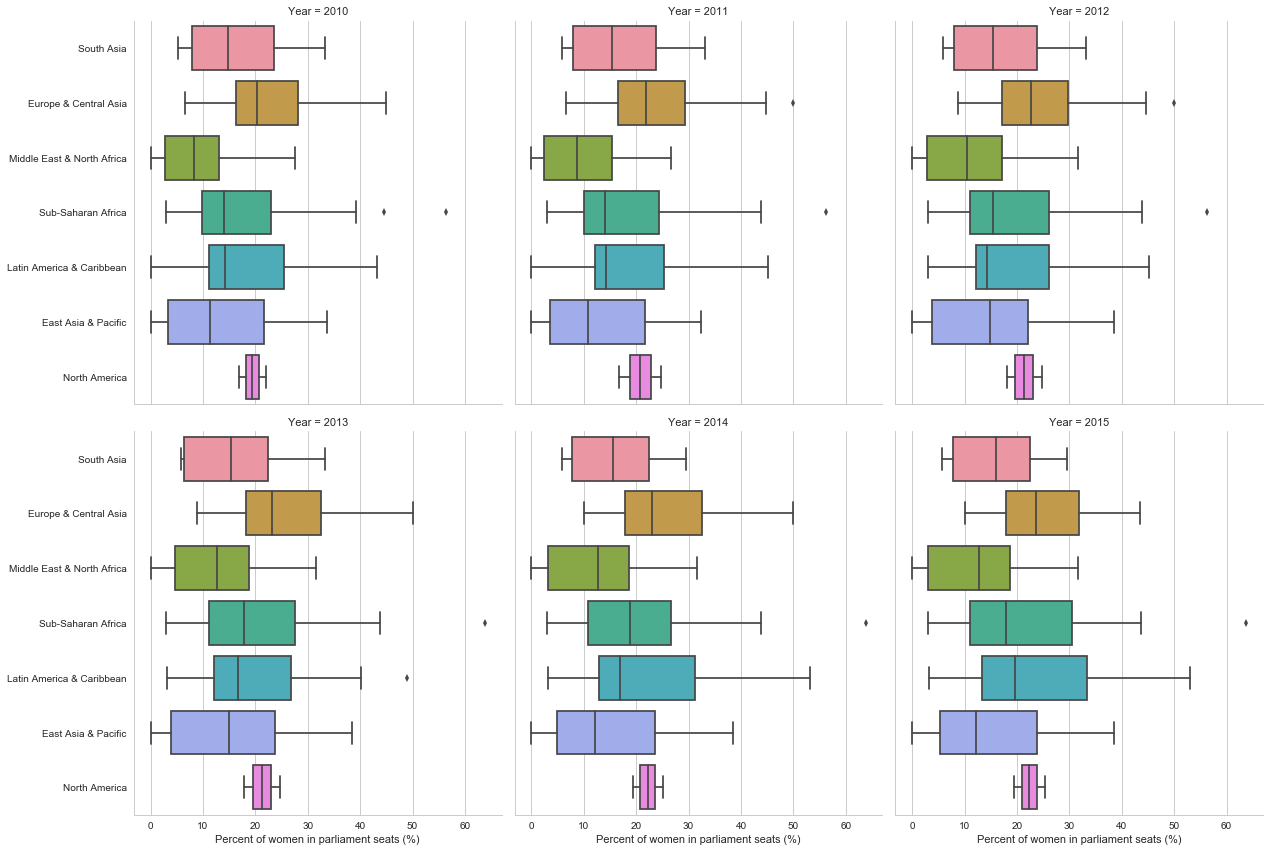

In [41]:
year_filter = full_data["Year"] >= 2010

pol = sns.factorplot(x="Value", y="Region", data=full_data[filter_pol & year_filter], units=pol_fullname,
               col="Year", col_wrap=3, kind="box",
               size=6, aspect=1);

pol.set_axis_labels("Percent of women in parliament seats (%)","");

In [33]:
full_data[filter_pol & year_filter].groupby(["Region", "Year"]).describe()

Value                                   \
                                count       mean        std        min   
Region                     Year                                          
East Asia & Pacific        2010  27.0  12.503704  10.626002   0.000000   
                           2011  27.0  12.855556  10.354870   0.000000   
                           2012  27.0  13.674074  10.672704   0.000000   
                           2013  27.0  13.962963  10.952666   0.000000   
                           2014  28.0  13.489286  10.830900   0.000000   
                           2015  28.0  13.650859  10.917770   0.000000   
Europe & Central Asia      2010  52.0  22.626923   9.974971   6.500000   
                           2011  52.0  23.498077  10.290248   6.600000   
                           2012  52.0  24.371154   9.766215   8.800000   
                           2013  52.0  24.796154   9.929792   8.800000   
                           2014  52.0  25.190385  10.029647  10.100000   
                           2015  52.0  25.236327   9.530147  10.101010   
Latin America & Caribbean  2010  33.0  18.009091  10.187718   0.000000   
                           2011  33.0  18.554545  11.033021   0.000000   
                           2012  33.0  19.218182  11.314135   3.100000   
                           2013  32.0  19.818750  11.703830   3.100000   
                           2014  33.0  22.160606  12.828141   3.100000   
                           2015  32.0  23.208228  12.692047   3.125000   
Middle East & North Africa 2010  20.0   9.760000   8.510885   0.000000   
                           2011  19.0   9.852632   8.437902   0.000000   
                           2012  20.0  11.285000   9.616120   0.000000   
                           2013  19.0  13.263158   9.403735   0.000000   
                           2014  19.0  13.094737  10.129466   0.000000   
                           2015  19.0  13.176738  10.320178   0.000000   
North America              2010   2.0  19.450000   3.747666  16.800000   
                           2011   2.0  20.800000   5.656854  16.800000   
                           2012   2.0  21.350000   4.737615  18.000000   
                           2013   2.0  21.300000   4.808326  17.900000   
                           2014   2.0  22.200000   4.101219  19.300000   
                           2015   2.0  22.364243   4.192725  19.399538   
South Asia                 2010   8.0  16.600000  10.440854   5.300000   
                           2011   8.0  16.862500  10.407818   5.800000   
                           2012   8.0  16.862500  10.407818   5.800000   
                           2013   8.0  16.375000  10.548087   5.800000   
                           2014   8.0  16.162500   9.553748   5.800000   
                           2015   8.0  16.268054   9.545644   5.777778   
Sub-Saharan Africa         2010  44.0  17.652273  11.371394   3.000000   
                           2011  46.0  18.932609  11.869495   3.000000   
                           2012  46.0  19.789130  11.995892   3.000000   
                           2013  46.0  20.819565  12.665818   3.000000   
                           2014  45.0  20.842222  12.428459   3.000000   
                           2015  46.0  21.293082  13.152190   3.030303   

                                                                             
                                       25%        50%        75%        max  
Region                     Year                                              
East Asia & Pacific        2010   3.400000  11.300000  21.700000  33.600000  
                           2011   3.550000  10.800000  21.750000  32.300000  
                           2012   3.850000  14.900000  22.100000  38.500000  
                           2013   3.850000  14.900000  23.800000  38.500000  
                           2014   4.950000  12.200000  23.625000  38.500000  
                           2015   5.326104  12.180180  23.791431  38.461538  

** Recommendations ** 

* There are other indicators related to gender that are more correlated to GDP i.e., Education, Labor participation, etc.
* Inverse, correlate women seats to access to access to prenatal care or contraceptives or education
* Social involvement doesn't stop at being in office, can be extended to economics